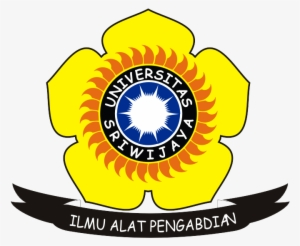

<h1>Syerpri Windriya Kusumawati (09011281823035)</h1>

<p>Pengujian Artificial Neural Network dengan Memprediksi Penyakit Serangan Jantung</p>

<h2>1. Perkenalan</h2>
<p>Serangan jantung terjadi akibat terhambatnya aliran darah ke otot jantung. Penyebab utama kondisi ini adalah penyakit jantung koroner, yaitu tersumbatnya pembuluh darah yang memasok darah ke jantung (pembuluh darah koroner), akibat timbunan kolesterol yang membentuk plak di dinding pembuluh darah.</p>

<h2>2. Isi</h2>

<h3>Memuat Dataset</h3>

In [2]:
import pandas as pd             
data = pd.read_csv('heart.csv')
data.head()
# Here is our data set

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<h3>Pemeriksaan Nilai Hilang</h3>

In [3]:
data.isnull().sum()
# This is beautiful, there is no missing value

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<h3>Outlier</h3>
<p>Kita perlu memeriksa situasi yang kontradiktif, tetapi sebelum itu ada baiknya melihat korelasi antar variabel.</p>

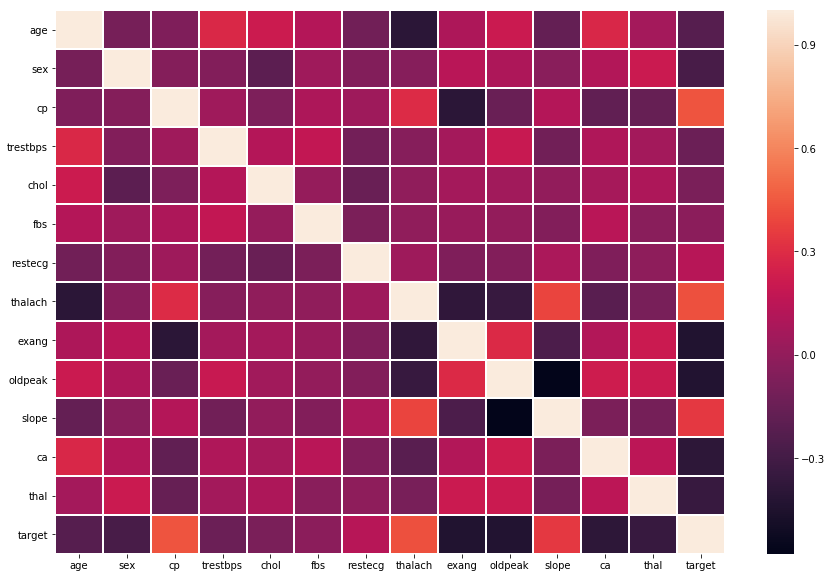

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),annot=False,linewidths=1);

<p>Thalach, Slope, CP, saya rasa ini mempengaruhi output.
<br>Jadi sebaiknya kita ambil kontradiksi dari 3 variabel yang mempengaruhi kita. Pertama, mari kita mulai dengan variabel Thalach</p>

<p>A. Thalach: Pengamatan kontradiktif</p>

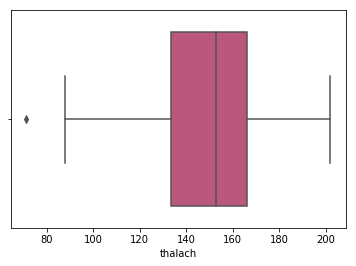

In [6]:
sns.boxplot(data['thalach'],palette='plasma_r');
# I want to believe that this outlier will not affect us much.

<p>B. Slope: Pengamatan Kontradiktif</p>

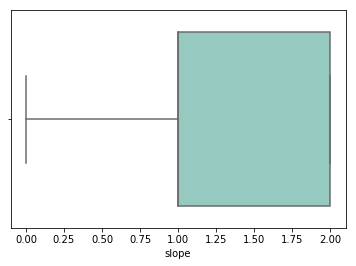

In [8]:
sns.boxplot(data['slope'],palette='Set3');
# Just fine

<p>C. CP: Pengamatan Kontradiktif</p>

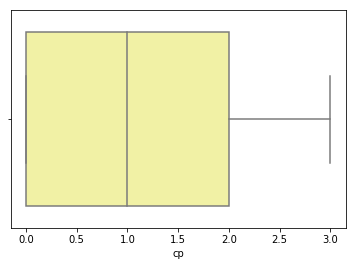

In [9]:
sns.boxplot(data['cp'],palette='terrain');
# Done

<p> Disini sudah terlihat bahwa kita tidak memiliki nilai yang hilang, pengamatan yang kontradiktif tidak menjadi masalah, jadi sekarang kita dapat membangun model jaringan saraf tiruan.</p>

<h3>Jaringan Saraf Tiruan</h3>

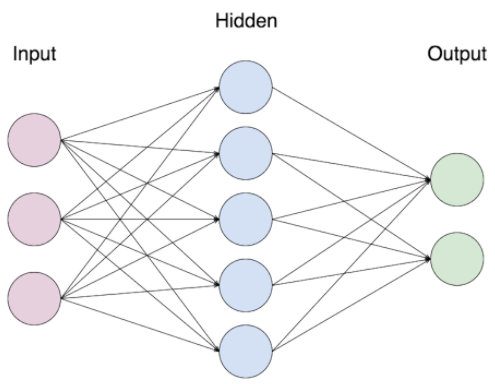

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score

# Here are the libraries we need

<p>Kita perlu memisahkan kumpulan data kita.</p>

In [11]:
y = data['target']
x = data.drop(['target'],axis=1)
# Y is our target variable
# X contains arguments

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
# Train and test separation.

<p>Sekarang kita perlu melakukan proses penskalaan agar model bekerja lebih baik.</p>

In [13]:
from sklearn.preprocessing import StandardScaler
# Here is the necessary library.

In [14]:
Scaler = StandardScaler() # We create a scaling object.
Scaler.fit(x_train) # We fit this to x_train.
x_train_scaled = Scaler.transform(x_train)
x_test_scaled = Scaler.transform(x_test)
# We have now standardized the sets to be used.

In [15]:
from sklearn.neural_network import MLPClassifier # Our artificial neural network library.
MLPC = MLPClassifier().fit(x_train_scaled,y_train) # We use x_train_scaled.
y_prediction = MLPC.predict(x_test_scaled) # We test with standardized x test.
print(y_prediction[:10]) # Estimated y values

[0 1 1 0 1 1 1 0 0 0]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [16]:
NewData = pd.DataFrame({'Real_Y_Values':y_test,
                       'Prediction_Y_Values':y_prediction})
NewData.head()
# Actual and predicted y values.

,Prediction_Y_Values,Real_Y_Values
179,0,0
228,1,0
111,1,1
246,0,0
60,1,1


In [17]:
accuracy_score(y_test,y_prediction)
# Pretty good test success but not over.

0.8131868131868132

<h3>Optimasi Model</h3>
<p>Saya dapat mengoptimalkan parameter model dengan melakukan koreksi pada model. Selanjutnya saya akan meningkatkan tingkat perkiraan yang benar. Lalu, saya akan mencari parameter model ke suatu fungsi dengan mencoba parameter berikut.</p>

In [18]:
MLPC_params = {
    'alpha':[0.1,0.01,0.02,0.005,0.0001,0.00001],
    'hidden_layer_sizes':[(10,10,10),
                         (100,100,100),
                         (100,100),
                         (3,5),
                         (5,3)],
    'solver':['lbfgs','adam','sgd'],
    'activation':['relu','logistic']
}
MLPC = MLPClassifier() # Clean models
MLPC_cv_model = GridSearchCV(MLPC,MLPC_params,cv=10,n_jobs=-1,verbose=2)
MLPC_cv_model.fit(x_train_scaled,y_train)
# If you don't know this method, gridsearch cv python --> investigate

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1013 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1508 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  4.0min finished
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=10, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05], 'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100), (100, 100), (3, 5), (5, 3)], 'solver': ['lbfgs', 'adam', 'sgd'], 'activation': ['relu', 'logistic']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [19]:
print('Best parameter for you <3:' + str(MLPC_cv_model.best_params_))

Best parameter for you <3:{'activation': 'relu', 'alpha': 0.02, 'hidden_layer_sizes': (100, 100), 'solver': 'sgd'}


In [20]:
MLPC_tuned = MLPClassifier(activation=MLPC_cv_model.best_params_['activation'],
                            alpha=MLPC_cv_model.best_params_['alpha'],
                            hidden_layer_sizes=MLPC_cv_model.best_params_['hidden_layer_sizes'],
                            solver=MLPC_cv_model.best_params_['solver'])
MLPC_tuned.fit(x_train_scaled,y_train)
y_pred_tuned = MLPC_tuned.predict(x_test_scaled)
accuracy_score(y_test,y_pred_tuned)

C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.8461538461538461

<p>Berhasil! Kita telah membangun model baru sesuai dengan parameter ini.</p>

<h1>3. Kesimpulan</h1>
<p>Pengujian ini telah menunjukkan bahwa jaringan saraf tiruan bekerja dengan baik pada kumpulan data yang besar. Basis data yang digunakan ini berisi 76 atribut, tetapi semua eksperimen yang dipublikasikan mengacu pada penggunaan subset dari 14 atribut. Secara khusus, database Cleveland adalah satu-satunya yang telah digunakan oleh peneliti ML untuk
tanggal ini. Bidang "target" mengacu pada adanya penyakit jantung pada pasien. Bilangan bulat bernilai 0 = tidak / kurang kemungkinan serangan jantung dan 1 = lebih banyak peluang serangan jantung. Tidak dapat dipastikan bahwa ada jaringan yang sempurna untuk setiap jenis database di luar sana. Jadi, teruslah menguji data Anda di beberapa jaringan saraf dan lihat mana yang paling cocok.</p>

Sumber : https://www.kaggle.com/omercansvgn/heart-attack-artificial-neural-networks